## Embeddings

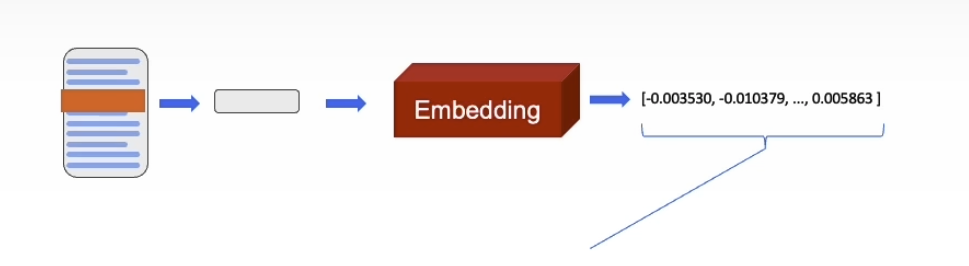

Embeddings 是將文字轉換成向量（數值陣列），這個向量會保留該文字的語意與內容特徵。語意相近的文字，其向量也會彼此接近。



My dog Rover likes to chase squirrels.

Fluffy, my cat, refuses to eat from a can.

The Chevy Bolt accelerates to 60 mph in 6.7 seconds.


對應的 Embedding 向量：

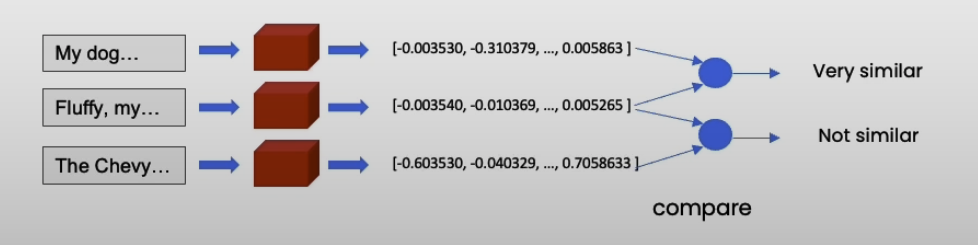

前兩句都是寵物相關，向量非常接近 → 相似度高

第三句是汽車相關，向量明顯不同 → 相似度低


In [2]:
from langchain_community.document_loaders import PyMuPDFLoader
loaders = [
    PyMuPDFLoader("./CKA_Curriculum_v1.32.pdf"),
    PyMuPDFLoader("./CKAD_Curriculum_v1.32.pdf"),
    PyMuPDFLoader("./CKS_Curriculum_v1.32.pdf"),
]

pages = []
for loader in loaders:
    pages.extend(loader.load())



In [3]:
# split
from langchain.text_splitter import RecursiveCharacterTextSplitter
text_splitter = RecursiveCharacterTextSplitter(
    chunk_size = 1500,
    chunk_overlap = 150
)

In [4]:
splits = text_splitter.split_documents(pages)
len(splits)

12

## Embeddings

In [5]:
from langchain_ollama import OllamaEmbeddings
embeddings = OllamaEmbeddings(model="llama3")

In [6]:
sentence1 = "i like dogs"
sentence2 = "i like lions"
sentence3 = "the weather is hot"

In [7]:
embedding1 = embeddings.embed_query(sentence1)
embedding2 = embeddings.embed_query(sentence2)
embedding3 = embeddings.embed_query(sentence3)

In [8]:
import numpy as np
np.dot(embedding1, embedding2) # 最接近

np.float64(0.6562301109688053)

In [9]:
np.dot(embedding1, embedding3)

np.float64(0.6343237340960042)

In [10]:
np.dot(embedding2, embedding3)

np.float64(0.4927557062041043)

## Vector stores

In [1]:
%pip install langchain-chroma

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
from langchain_chroma import Chroma

In [13]:
persist_directory = './chroma/'

In [14]:
!rm -rf ./chroma  # remove old database files if any

In [15]:
vectordb = Chroma.from_documents(
    documents=splits,
    embedding=embeddings,
    persist_directory=persist_directory
)

In [16]:
print(vectordb._collection.count())

12


In [17]:
vectordb.persist()

/tmp/ipykernel_1073/3711397106.py:1: LangChainDeprecationWarning: Since Chroma 0.4.x the manual persistence method is no longer supported as docs are automatically persisted.
  vectordb.persist()


### Similarity Search

In [18]:
question = "CKS Curriculum"


In [32]:
docs = vectordb.similarity_search(question, k=3)

In [33]:
len(docs) # k 為 3，理論應為 3

3

In [21]:
docs[0].page_content

'Certified Kubernetes Security Specialist (CKS) Exam Curriculum\n2\nThis document provides the curriculum outline of the Knowledge, Skills and Abilities \nthat a Certified Kubernetes Security Specialist (CKS) can be expected to demonstrate.\nCKS Curriculum\n15% - Cluster Setup\n20% - Minimize Microservice \nVulnerabilities\n15% - Cluster Hardening\n20% - Supply Chain Security\n•\t Use Network security policies to restrict \ncluster level access\n•\t Use CIS benchmark to review the security \nconfiguration of Kubernetes components \n(etcd, kubelet, kubedns, kubeapi)\n•\t Properly set up Ingress objects with TLS\n•\t Protect node metadata and endpoints\n•\t Verify platform binaries before deploying\n•\t Use appropriate pod security standards\n•\t Manage kubernetes secrets\n•\t Understand and implement isolation\ntechniques (multi-tenancy, sandboxed \ncontainers, etc.)\n•\t Implement Pod-to-Pod encryption\n(Cilium, Istio)\n•\t Use Role Based Access Controls to \nminimize exposure\n•\t Exe

In [22]:
question = "Argo CD in CNCF ?"

In [23]:
docs = vectordb.similarity_search(question,k=5)

In [24]:
docs[0]

Document(metadata={'creationDate': "D:20241211195527-05'00'", 'creator': 'Adobe InDesign 20.0 (Macintosh)', 'trapped': '', 'creationdate': '2024-12-11T19:55:27-05:00', 'moddate': '2024-12-11T19:55:27-05:00', 'author': '', 'file_path': './CKA_Curriculum_v1.32.pdf', 'keywords': '', 'producer': 'Adobe PDF Library 17.0', 'format': 'PDF 1.4', 'title': '', 'page': 2, 'total_pages': 3, 'modDate': "D:20241211195527-05'00'", 'subject': '', 'source': './CKA_Curriculum_v1.32.pdf'}, page_content='Cloud native computing uses an open source software stack to \ndeploy applications as microservices, packaging each part into its \nown container, and dynamically orchestrating those containers to \noptimize resource utilization. The Cloud Native Computing Foundation \n(CNCF) hosts critical components of those software stacks including \nKubernetes, Fluentd, Linkerd, Prometheus, OpenTracing and gRPC; \nbrings together the industry’s top developers, end users, and vendors; \nand serves as a neutral home fo

In [25]:
docs[1]

Document(metadata={'keywords': '', 'producer': '3.0.24 (5.1.10)', 'modDate': "D:20250519175150+02'00'", 'format': 'PDF 1.5', 'page': 2, 'trapped': '', 'creationDate': "D:20250423093125-04'00'", 'creator': 'Adobe InDesign 20.0 (Macintosh)', 'moddate': '2025-05-19T17:51:50+02:00', 'source': './CKAD_Curriculum_v1.32.pdf', 'total_pages': 3, 'author': '', 'creationdate': '2025-04-23T09:31:25-04:00', 'title': '', 'subject': '', 'file_path': './CKAD_Curriculum_v1.32.pdf'}, page_content='Cloud native computing uses an open source software stack to \ndeploy applications as microservices, packaging each part into its \nown container, and dynamically orchestrating those containers to \noptimize resource utilization. The Cloud Native Computing Foundation \n(CNCF) hosts critical components of those software stacks including \nKubernetes, Fluentd, Linkerd, Prometheus, OpenTracing and gRPC; \nbrings together the industry’s top developers, end users, and vendors; \nand serves as a neutral home for col

In [26]:
question = "CKAD Curriculum topic"


In [27]:
docs = vectordb.similarity_search(question,k=5)

In [28]:
for doc in docs:
    print(doc.metadata)

{'source': './CKAD_Curriculum_v1.32.pdf', 'format': 'PDF 1.5', 'moddate': '2025-05-19T17:51:50+02:00', 'subject': '', 'trapped': '', 'modDate': "D:20250519175150+02'00'", 'producer': '3.0.24 (5.1.10)', 'creationDate': "D:20250423093125-04'00'", 'total_pages': 3, 'creationdate': '2025-04-23T09:31:25-04:00', 'title': '', 'file_path': './CKAD_Curriculum_v1.32.pdf', 'keywords': '', 'page': 1, 'creator': 'Adobe InDesign 20.0 (Macintosh)', 'author': ''}
{'title': '', 'producer': 'Adobe PDF Library 17.0', 'keywords': '', 'creator': 'Adobe InDesign 20.0 (Macintosh)', 'total_pages': 3, 'page': 0, 'creationdate': '2025-04-08T08:47:51-04:00', 'source': './CKS_Curriculum_v1.32.pdf', 'trapped': '', 'file_path': './CKS_Curriculum_v1.32.pdf', 'modDate': "D:20250408084751-04'00'", 'creationDate': "D:20250408084751-04'00'", 'subject': '', 'format': 'PDF 1.4', 'author': '', 'moddate': '2025-04-08T08:47:51-04:00'}
{'file_path': './CKAD_Curriculum_v1.32.pdf', 'subject': '', 'keywords': '', 'title': '', 't

In [29]:
print(docs[1].page_content)

Certified Kubernetes
Security Specialist (CKS)
Exam Curriculum
A Cloud Native Computing Foundation (CNCF) Publication 
cncf.io
